In [1]:
import itk
import matplotlib.pylab as plt
import numpy as np
from itkwidgets import view
import os
import pydicom
#!pip install pydicom  #only  to get it first time.

In [2]:
folder = "brain_ct_data"
imageList = os.listdir(folder) #getting the list.
cts = [pydicom.dcmread(folder+"/"+image_file) for image_file in imageList] #creating the ctseries.


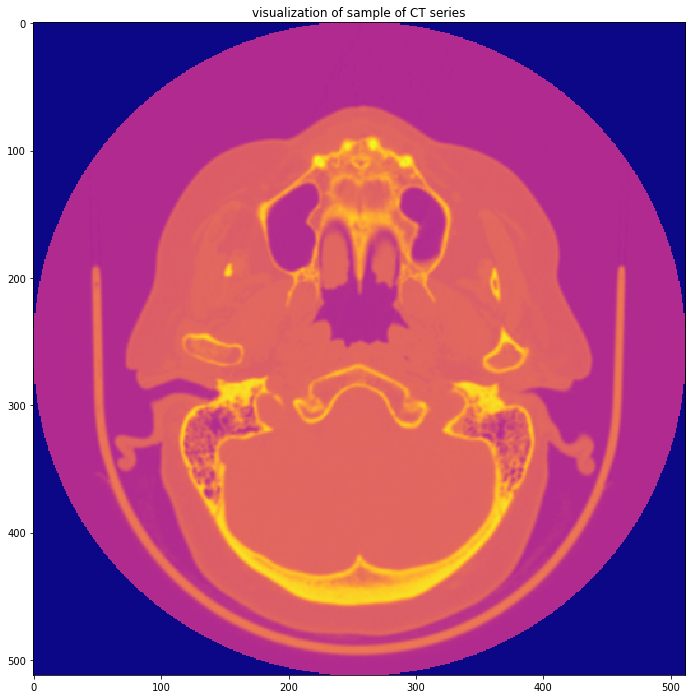

In [3]:
dataset = cts[36] #getting one sample of the ctseries.
rows = int(dataset.Rows)
cols = int(dataset.Columns)
xspacing = dataset.PixelSpacing[0]
yspacing = dataset.PixelSpacing[1]

myimage = dataset.pixel_array
plt.rcParams['figure.figsize'] = [12,12]
plt.imshow(myimage, cmap=plt.cm.plasma)
plt.title('visualization of sample of CT series')
plt.show()

In [4]:
#sorting the CTseries based on their Instance number.
indices = [ cts[x].InstanceNumber for x in range(len(cts)) ]


# Subplot without taking into account the Instance Numbers

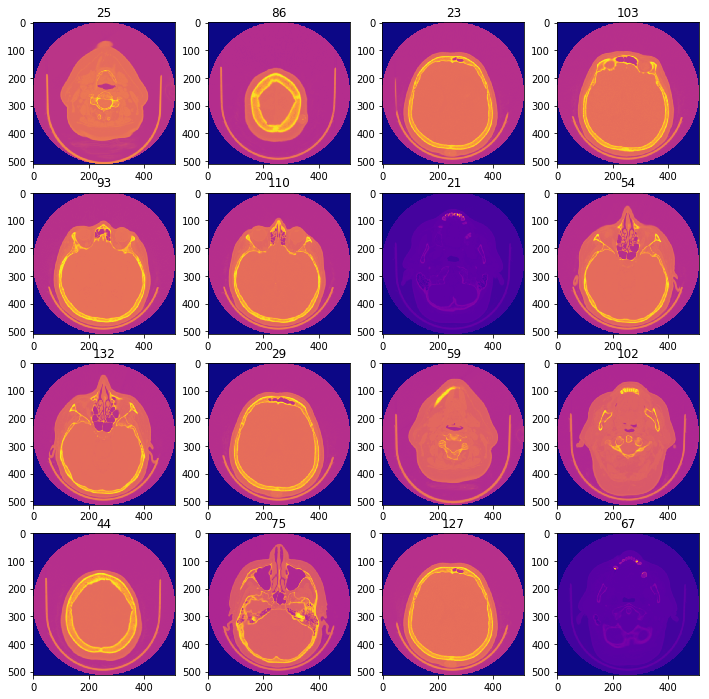

In [5]:
# Visualization using the indices without using yet the Instance Number.
N = 80
for x in range(N,N+16):
    plt.subplot(4,4, x-(N-1))
    plt.imshow(cts[indices[x]].pixel_array, cmap=plt.cm.plasma)
    plt.title(indices[x])
    
plt.show()

# Subplot with correct ordering based in sorted indices

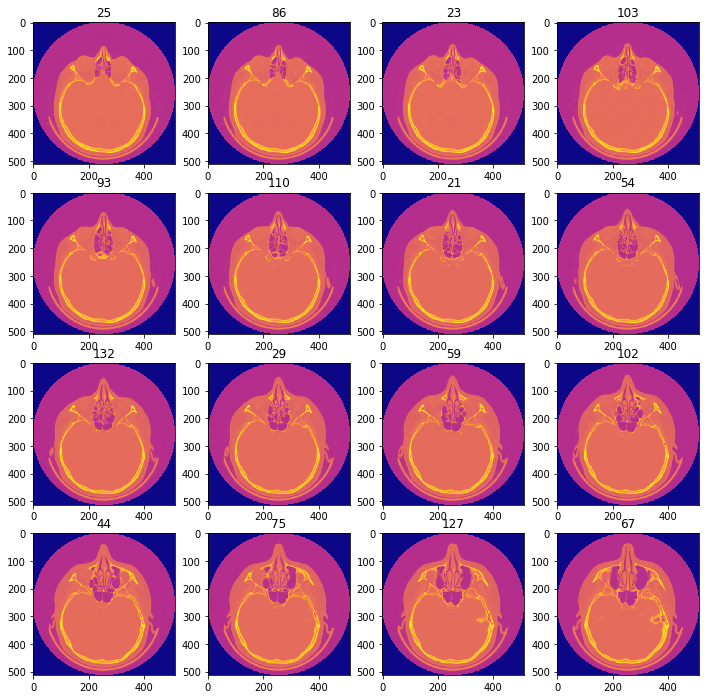

In [6]:
# Visualization based on their correct Instance Number.
sortedIndices = np.argsort(indices)
N = 80
for x in range(N,N+16):
    plt.subplot(4,4, x-(N-1))
    plt.imshow(cts[sortedIndices[x]].pixel_array, cmap=plt.cm.plasma)
    plt.title(indices[x])
    
plt.show()

# Creation of the 3-D array from the CTseries

In [7]:
fimg = np.zeros([160,512,512]) # creation of the 3-D array that will 
                               #hold all the values.

print('Fimg 3-d array created.')

for i in range(160):
    print("CT [ %d / 160 ]"%(i+1))
    for j in range(512):
        for k in range(512):
            fimg[i][j][k] = cts[sortedIndices[i]].pixel_array[j][k]
print('Complete image stored.')


Fimg 3-d array created.
CT [ 1 / 160 ]
CT [ 2 / 160 ]
CT [ 3 / 160 ]
CT [ 4 / 160 ]
CT [ 5 / 160 ]
CT [ 6 / 160 ]
CT [ 7 / 160 ]
CT [ 8 / 160 ]
CT [ 9 / 160 ]
CT [ 10 / 160 ]
CT [ 11 / 160 ]
CT [ 12 / 160 ]
CT [ 13 / 160 ]
CT [ 14 / 160 ]
CT [ 15 / 160 ]
CT [ 16 / 160 ]
CT [ 17 / 160 ]
CT [ 18 / 160 ]
CT [ 19 / 160 ]
CT [ 20 / 160 ]
CT [ 21 / 160 ]
CT [ 22 / 160 ]
CT [ 23 / 160 ]
CT [ 24 / 160 ]
CT [ 25 / 160 ]
CT [ 26 / 160 ]
CT [ 27 / 160 ]
CT [ 28 / 160 ]
CT [ 29 / 160 ]
CT [ 30 / 160 ]
CT [ 31 / 160 ]
CT [ 32 / 160 ]
CT [ 33 / 160 ]
CT [ 34 / 160 ]
CT [ 35 / 160 ]
CT [ 36 / 160 ]
CT [ 37 / 160 ]
CT [ 38 / 160 ]
CT [ 39 / 160 ]
CT [ 40 / 160 ]
CT [ 41 / 160 ]
CT [ 42 / 160 ]
CT [ 43 / 160 ]
CT [ 44 / 160 ]
CT [ 45 / 160 ]
CT [ 46 / 160 ]
CT [ 47 / 160 ]
CT [ 48 / 160 ]
CT [ 49 / 160 ]
CT [ 50 / 160 ]
CT [ 51 / 160 ]
CT [ 52 / 160 ]
CT [ 53 / 160 ]
CT [ 54 / 160 ]
CT [ 55 / 160 ]
CT [ 56 / 160 ]
CT [ 57 / 160 ]
CT [ 58 / 160 ]
CT [ 59 / 160 ]
CT [ 60 / 160 ]
CT [ 61 / 160 ]
CT [ 62 /

# Visualize 3-D array

In [38]:
## TODO visualize asymmetric
#:: Here show image with the previews not good z-spacing.
#thisimage = itk.GetImageFromArray(fimg)
thisimage = itk.GetImageViewFromArray(fimg)
#view(thisimage)


# Visualize 3-D array with correct spacings

In [40]:
#visualize symmetric
#setting the correct equal in all axes spacings.
thisimage.SetSpacing([xspacing, xspacing, xspacing])
print(" New x,y,z spacings set to: %s" %(thisimage.GetSpacing()))
#view(thisimage)


 New x,y,z spacings set to: itkVectorD3 ([0.474609, 0.474609, 0.474609])


# Transform/Visualize the 3-D array into Hounsfield Units.

In [13]:
slope = dataset.RescaleSlope
intercept = dataset.RescaleIntercept
hudata3d = fimg.copy()
hudata3d = hudata3d * slope + intercept

#view(hudata3d)

# Separating bone using the HU image.

In [17]:
bone3d = hudata3d.copy()

for i in range(160):
    print("[%d/160] ..done"%(i+1))
    for j in range(512):
        for k in range(512):            
            if(hudata3d[i][j][k] > 700):
                bone3d[i][j][k] = 1
            else:
                bone3d[i][j][k] = 0
                
#view(bone3d)
            

[1/160] ..done
[2/160] ..done
[3/160] ..done
[4/160] ..done
[5/160] ..done
[6/160] ..done
[7/160] ..done
[8/160] ..done
[9/160] ..done
[10/160] ..done
[11/160] ..done
[12/160] ..done
[13/160] ..done
[14/160] ..done
[15/160] ..done
[16/160] ..done
[17/160] ..done
[18/160] ..done
[19/160] ..done
[20/160] ..done
[21/160] ..done
[22/160] ..done
[23/160] ..done
[24/160] ..done
[25/160] ..done
[26/160] ..done
[27/160] ..done
[28/160] ..done
[29/160] ..done
[30/160] ..done
[31/160] ..done
[32/160] ..done
[33/160] ..done
[34/160] ..done
[35/160] ..done
[36/160] ..done
[37/160] ..done
[38/160] ..done
[39/160] ..done
[40/160] ..done
[41/160] ..done
[42/160] ..done
[43/160] ..done
[44/160] ..done
[45/160] ..done
[46/160] ..done
[47/160] ..done
[48/160] ..done
[49/160] ..done
[50/160] ..done
[51/160] ..done
[52/160] ..done
[53/160] ..done
[54/160] ..done
[55/160] ..done
[56/160] ..done
[57/160] ..done
[58/160] ..done
[59/160] ..done
[60/160] ..done
[61/160] ..done
[62/160] ..done
[63/160] ..done
[

In [1]:
bone3d

NameError: name 'bone3d' is not defined